<a href="https://colab.research.google.com/github/alexx99-hs/music-ml-lab/blob/main/01_audio_representation/genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

PROJECT_ROOT = "/content/drive/MyDrive/music-ml-lab"
os.makedirs(PROJECT_ROOT, exist_ok=True)

print("Project root:", PROJECT_ROOT)


Project root: /content/drive/MyDrive/music-ml-lab


In [3]:
!pip install -q librosa soundfile numpy scipy matplotlib scikit-learn pandas
import librosa
import numpy as np
import matplotlib.pyplot as plt

print("librosa version:", librosa.__version__)
print("numpy version:", np.__version__)


librosa version: 0.11.0
numpy version: 2.0.2


In [4]:
DATA_ROOT = f"{PROJECT_ROOT}/data"
RAW_AUDIO_DIR = f"{DATA_ROOT}/raw"

os.makedirs(RAW_AUDIO_DIR, exist_ok=True)

print("Raw audio dir:", RAW_AUDIO_DIR)


Raw audio dir: /content/drive/MyDrive/music-ml-lab/data/raw


In [5]:
import os

# Create Kaggle config directory
os.makedirs("/root/.kaggle", exist_ok=True)


In [6]:
%%writefile /root/.kaggle/kaggle.json
{
  "username": "mahrokhhassani",
  "key": "KGAT_64db9e43006dbfe9e693b1cba2546dff"
}


Writing /root/.kaggle/kaggle.json


In [7]:
!chmod 600 /root/.kaggle/kaggle.json


In [8]:
!pip install -q kaggle
DATA_ROOT = f"{PROJECT_ROOT}/data"
RAW_AUDIO_DIR = f"{DATA_ROOT}/raw"

os.makedirs(RAW_AUDIO_DIR, exist_ok=True)

!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification -p {RAW_AUDIO_DIR}


Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
import zipfile

zip_path = os.path.join(RAW_AUDIO_DIR, "gtzan-dataset-music-genre-classification.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(RAW_AUDIO_DIR)

print("Extraction complete")


KeyboardInterrupt: 

In [12]:
import os

base_path = os.path.join(RAW_AUDIO_DIR, "Data", "genres_original")

genres = sorted(os.listdir(base_path))
print("Genres found:", genres)
print("Number of genres:", len(genres))

for g in genres:
    files = os.listdir(os.path.join(base_path, g))
    print(g, ":", len(files))


Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Number of genres: 10
blues : 100
classical : 100
country : 100
disco : 100
hiphop : 100
jazz : 100
metal : 100
pop : 100
reggae : 100
rock : 100


In [13]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

BASE_AUDIO_PATH = os.path.join(RAW_AUDIO_DIR, "Data", "genres_original")

genre = "jazz"  # change later if you want
filename = os.listdir(os.path.join(BASE_AUDIO_PATH, genre))[0]

audio_path = os.path.join(BASE_AUDIO_PATH, genre, filename)
audio_path


'/content/drive/MyDrive/music-ml-lab/data/raw/Data/genres_original/jazz/jazz.00000.wav'

In [14]:
y, sr = librosa.load(audio_path, sr=None)

print("Signal shape:", y.shape)
print("Sample rate:", sr)
print("Duration (sec):", len(y) / sr)


Signal shape: (661794,)
Sample rate: 22050
Duration (sec): 30.013333333333332


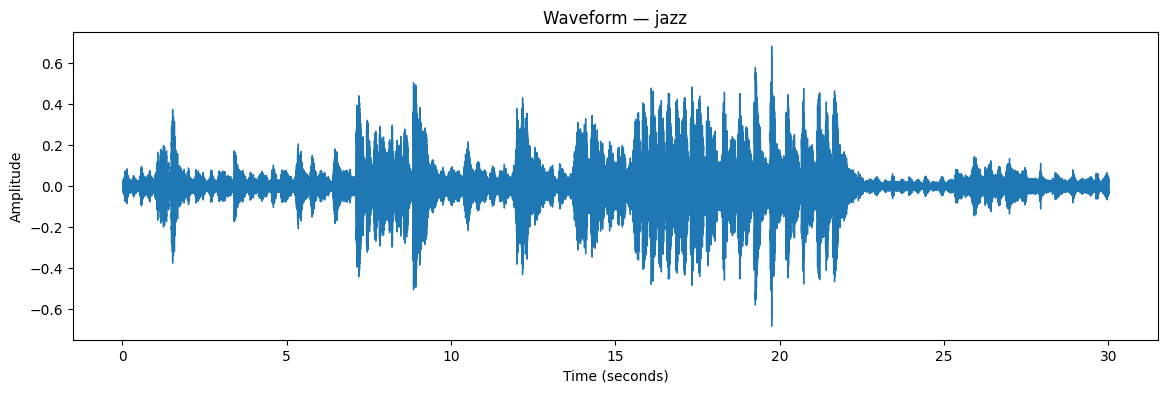

In [15]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform — {genre}")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [16]:
mel_spec = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_mels=128,
    fmax=sr // 2
)

mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

print("Mel-spectrogram shape:", mel_spec_db.shape)


Mel-spectrogram shape: (128, 1293)


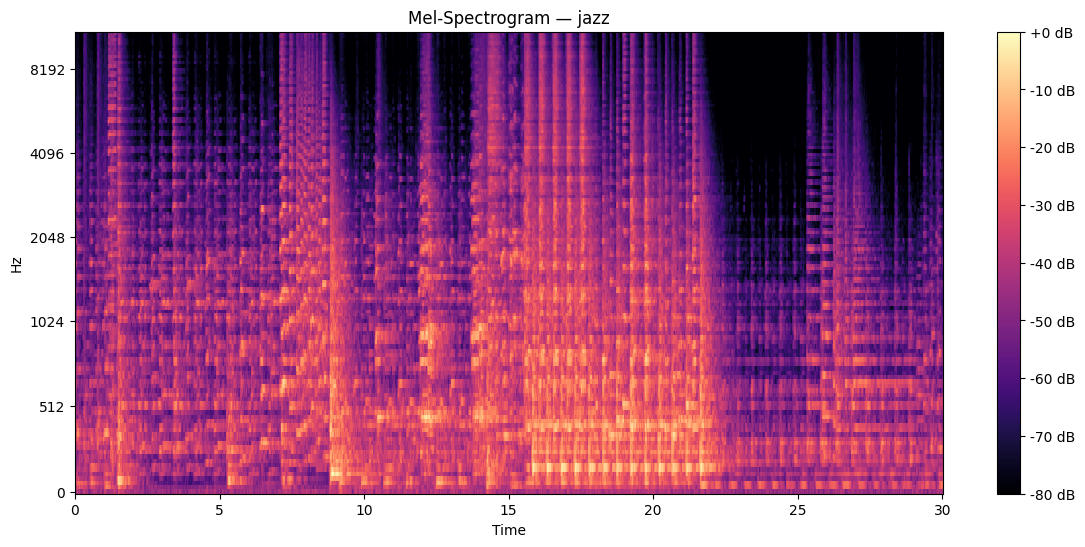

In [17]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(
    mel_spec_db,
    sr=sr,
    x_axis="time",
    y_axis="mel",
    fmax=sr // 2
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"Mel-Spectrogram — {genre}")
plt.show()


MFCC shape: (13, 1293)


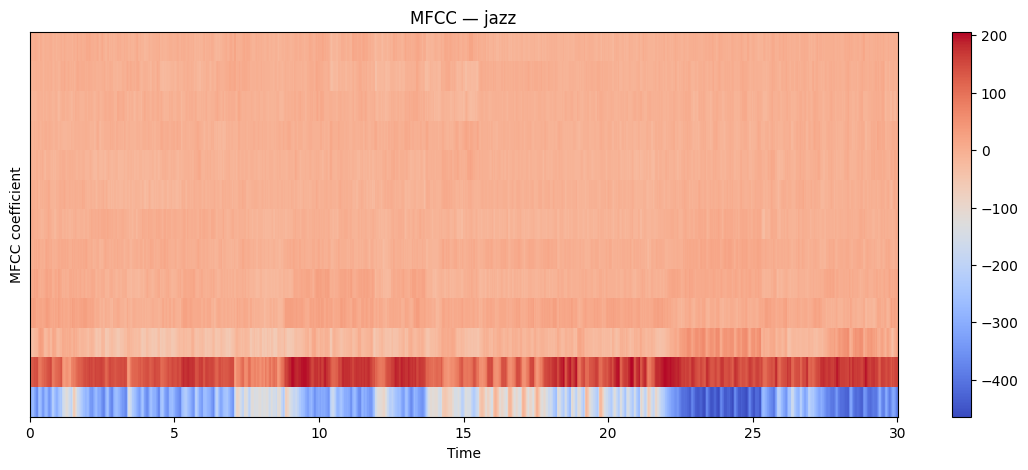

Spectral centroid shape: (1, 1293)
Mean spectral centroid: 1503.9322999254405
ZCR shape: (1, 1293)
Mean ZCR: 0.07841653373936582
Final feature vector length: (30,)


In [18]:
import numpy as np

mfcc = librosa.feature.mfcc(
    y=y,
    sr=sr,
    n_mfcc=13
)

print("MFCC shape:", mfcc.shape)
plt.figure(figsize=(14, 5))
librosa.display.specshow(
    mfcc,
    x_axis="time",
    sr=sr
)
plt.colorbar()
plt.title(f"MFCC — {genre}")
plt.ylabel("MFCC coefficient")
plt.show()

spectral_centroid = librosa.feature.spectral_centroid(
    y=y,
    sr=sr
)

print("Spectral centroid shape:", spectral_centroid.shape)
print("Mean spectral centroid:", np.mean(spectral_centroid))
zcr = librosa.feature.zero_crossing_rate(y)

print("ZCR shape:", zcr.shape)
print("Mean ZCR:", np.mean(zcr))
feature_vector = np.hstack([
    np.mean(mfcc, axis=1),
    np.std(mfcc, axis=1),
    np.mean(spectral_centroid),
    np.std(spectral_centroid),
    np.mean(zcr),
    np.std(zcr)
])

print("Final feature vector length:", feature_vector.shape)
